## Hough Circle Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

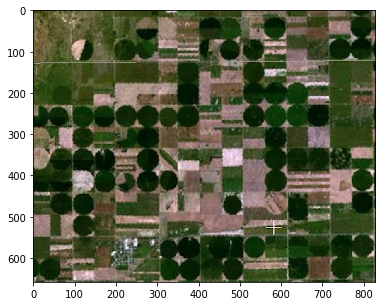

In [5]:
# Read in the image
image = cv2.imread('images/round_farms.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image)

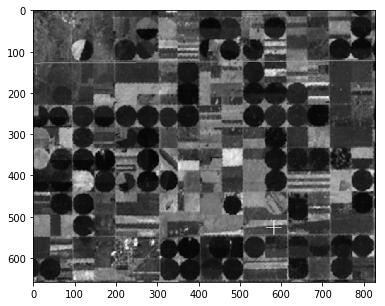

In [7]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.figure(figsize=(10, 5))
plt.imshow(gray_blur, cmap='gray')

### HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image
* detection method (Hough gradient)
* resolution factor between the detection and image (1),
* minDist - the minimum distance between circles
* param1 - the higher value for performing Canny edge detection
* param2 - threshold for circle detection, a smaller value --> more circles will be detected
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

Circles shape:  (1, 78, 3)
Circles shape:  (1, 91, 3)
Circles shape:  (1, 37, 3)


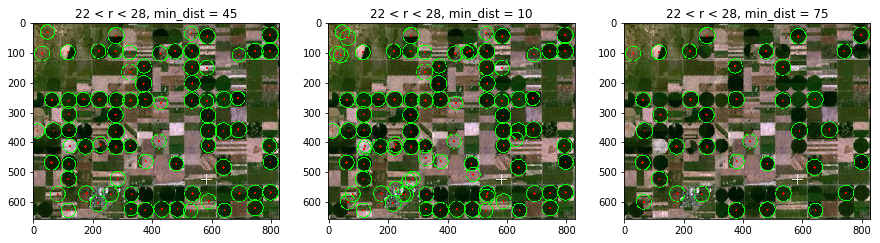

In [23]:
def get_Hough_circles(gray_blur, min_dist, min_radious, max_radious):
    ## TODO: use HoughCircles to detect circles
    # right now there are too many, large circles being detected
    # try changing the value of maxRadius, minRadius, and minDist
    circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                               minDist = min_dist,
                               param1 = 70,
                               param2 = 11,
                               minRadius = min_radious,
                               maxRadius = max_radious) # Look the picture below. Between x=300 and x=400. You see two circles side
                                         # by side. The occupy 100 pixels, each one with diameter equals 50 pixels,
                                         # so, radious of 25 pixels (more or less)

# convert circles into expected type
    circles = np.uint16(np.around(circles))

    print('Circles shape: ', circles.shape)
    return circles

circles_1 = get_Hough_circles(gray_blur, 45, 22, 28)
circles_2 = get_Hough_circles(gray_blur, 10, 22, 28)
circles_3 = get_Hough_circles(gray_blur, 75, 22, 28)

# for drawing circles on
circles_imgs = [np.copy(image), np.copy(image), np.copy(image)]
circles = [circles_1, circles_2, circles_3]
    
for i in range(len(circles)):
# draw each one
    for c in circles[i][0,:]: # j = (x_center, y_center, radious)
        # draw the outer circle
        cv2.circle(circles_imgs[i],(c[0],c[1]),c[2],(0,255,0),2) # 2 is thickness
        # draw the center of the circle
        cv2.circle(circles_imgs[i],(c[0],c[1]),2,(255,0,0),3)
    
    
f, (p1, p2, p3) = plt.subplots(1, 3, figsize=(15,10))

p1.set_title("22 < r < 28, min_dist = 45")
p1.imshow(circles_imgs[0])

p2.set_title("22 < r < 28, min_dist = 10")
p2.imshow(circles_imgs[1])

p3.set_title("22 < r < 28, min_dist = 75")
p3.imshow(circles_imgs[2])